In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\pc\Documents\Gayatri-Documents\heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Exploratory Data Analysis

In [4]:
#Get the number of rows and columns
df.shape

(303, 14)

In [5]:
#Get the name of all the columns
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
#Get the number of Nan values in each column
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


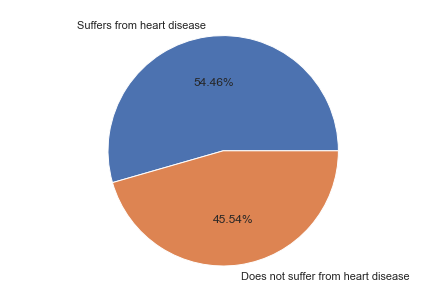

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Suffers from heart disease', 'Does not suffer from heart disease']
ax.pie(df["target"].value_counts(), labels = langs,autopct='%1.2f%%')
plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

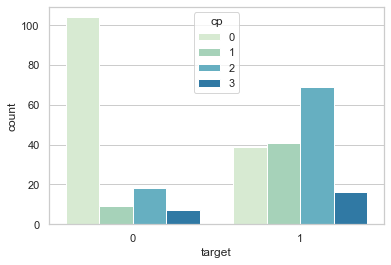

In [20]:
sns.countplot(x='target',hue='cp', data=df, palette = "GnBu")

<AxesSubplot:xlabel='target', ylabel='count'>

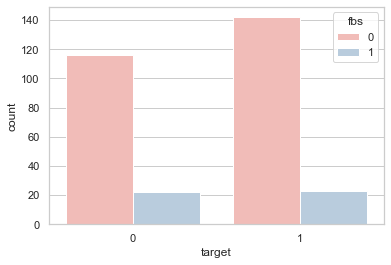

In [21]:
sns.countplot(x='target',hue='fbs', data=df, palette = "Pastel1")

<AxesSubplot:xlabel='target', ylabel='age'>

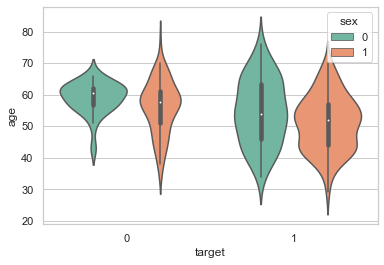

In [15]:
sns.set(style = 'whitegrid')
sns.violinplot(y='age',x='target', hue='sex',data=df,palette="Set2")

<AxesSubplot:xlabel='target', ylabel='chol'>

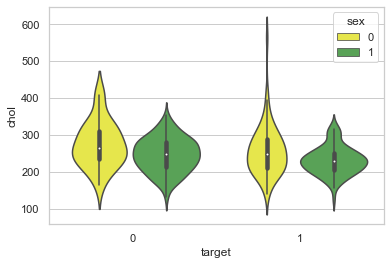

In [16]:
sns.set(style = 'whitegrid')
sns.violinplot(y='chol',x='target', hue='sex',data=df,palette="Set1_r")

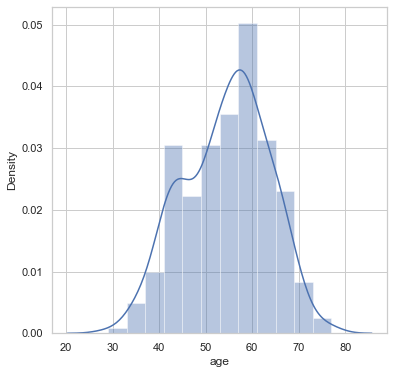

In [30]:
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.show()

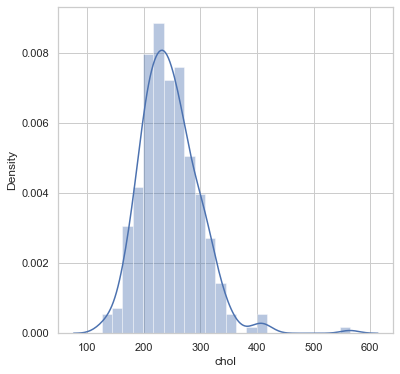

In [29]:
plt.figure(figsize=(6,6))
sns.distplot(df['chol'])
plt.show()

# Algorithm Implementation

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [26]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [35]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
predict_train_data = log_reg.predict(X_test)
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.791


In [36]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
predict_train_data = nb.predict(X_test)
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.791


In [43]:
from sklearn.svm import SVC
svm=SVC(kernel='linear', C=0.025, random_state=120)
svm.fit(X_train,y_train)
predict_train_data = svm.predict(X_test)
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.758


In [44]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=15)
random_forest_model.fit(X_train, y_train.ravel())
predict_train_data = random_forest_model.predict(X_test)
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.780
